Select the Right Threshold values using ROC Curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# roc curve and auc score
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings('ignore')

## make classification is a techniqe of creating datasets(synthetic data) it generates random n-class classification problem
## this initially  creates clusters of points normally distributed with standard deviation is 1

In [2]:
from sklearn.model_selection import train_test_split

## problem statement : to give sample of 2000 data points , number of classes=2 ,weights should be equal 
## like one categry of data points should have 1000 data points and the other category too have 1000 data points
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
X.shape
## 20 feactures , 2000 rows

(2000, 20)

In [4]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Random Forests

In [7]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9820277777777778


In [8]:
ytrain_pred

array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.02, 0.98],
       ...,
       [0.97, 0.03],
       [0.99, 0.01],
       [0.24, 0.76]])

Logistic Regression

In [9]:
## here probability is 0.5

from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


In [20]:
log_classifier.predict_proba(X_train)

array([[9.99688479e-01, 3.11520635e-04],
       [9.99966000e-01, 3.39995695e-05],
       [2.09976771e-02, 9.79002323e-01],
       ...,
       [8.58463348e-01, 1.41536652e-01],
       [9.99422335e-01, 5.77665099e-04],
       [6.07714035e-01, 3.92285965e-01]])

In [21]:
log_classifier.predict_proba(X_train)[:,1] ## for first probability

array([3.11520635e-04, 3.39995695e-05, 9.79002323e-01, ...,
       1.41536652e-01, 5.77665099e-04, 3.92285965e-01])

In [10]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


KNNClassifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


No we will focus on selecting the best threshold for maximum accuracy

In [12]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9846555555555555


In [13]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,0.98,0.966929,0.538202,0.8
3,0.94,0.761539,0.509875,0.8
4,0.59,0.779443,0.490344,0.4
...,...,...,...,...
595,0.02,0.024239,0.461121,0.0
596,0.03,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.05,0.001147,0.441720,0.2


In [14]:
final_prediction

0      0.885262
1      0.118323
2      0.821283
3      0.752853
4      0.564947
         ...   
595    0.126340
596    0.117845
597    0.879197
598    0.173217
599    0.837357
Length: 600, dtype: float64

In [15]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.90924686, 0.90924686, 0.90156694, 0.90077475, 0.80876012,
       0.8055558 , 0.77673524, 0.77537124, 0.74180851, 0.74137362,
       0.71657482, 0.71143711, 0.68513034, 0.67993537, 0.62366701,
       0.59675354, 0.59462652, 0.59300386, 0.5740152 , 0.56986186,
       0.55899047, 0.55889283, 0.54595371, 0.53877948, 0.51365858,
       0.50616892, 0.46240225, 0.44794916, 0.44200602, 0.42686151,
       0.41629719, 0.34683098, 0.34586612, 0.24154122, 0.24140421,
       0.22948424, 0.22896893, 0.20539681, 0.20098417, 0.12301207,
       0.1228351 , 0.10648508])

In [24]:
thresholds

array([1.90924686, 0.90924686, 0.90156694, 0.90077475, 0.80876012,
       0.8055558 , 0.77673524, 0.77537124, 0.74180851, 0.74137362,
       0.71657482, 0.71143711, 0.68513034, 0.67993537, 0.62366701,
       0.59675354, 0.59462652, 0.59300386, 0.5740152 , 0.56986186,
       0.55899047, 0.55889283, 0.54595371, 0.53877948, 0.51365858,
       0.50616892, 0.46240225, 0.44794916, 0.44200602, 0.42686151,
       0.41629719, 0.34683098, 0.34586612, 0.24154122, 0.24140421,
       0.22948424, 0.22896893, 0.20539681, 0.20098417, 0.12301207,
       0.1228351 , 0.10648508])

In [22]:
tpr

array([0.        , 0.00333333, 0.04333333, 0.04333333, 0.60666667,
       0.60666667, 0.70333333, 0.70333333, 0.79333333, 0.79333333,
       0.85666667, 0.85666667, 0.88      , 0.88      , 0.91333333,
       0.91333333, 0.91666667, 0.91666667, 0.93666667, 0.93666667,
       0.95      , 0.95      , 0.96      , 0.96      , 0.96333333,
       0.96333333, 0.97333333, 0.97333333, 0.98      , 0.98      ,
       0.98333333, 0.98333333, 0.98666667, 0.98666667, 0.99      ,
       0.99      , 0.99333333, 0.99333333, 0.99666667, 0.99666667,
       1.        , 1.        ])

In [23]:
fpr

array([0.        , 0.        , 0.        , 0.00333333, 0.00333333,
       0.01      , 0.01      , 0.01666667, 0.01666667, 0.02      ,
       0.02      , 0.02333333, 0.02333333, 0.02666667, 0.02666667,
       0.03333333, 0.03333333, 0.03666667, 0.03666667, 0.04      ,
       0.04      , 0.04333333, 0.04333333, 0.05      , 0.05      ,
       0.05333333, 0.05333333, 0.05666667, 0.05666667, 0.06666667,
       0.06666667, 0.11      , 0.11      , 0.23      , 0.23      ,
       0.24666667, 0.24666667, 0.30333333, 0.30333333, 0.66666667,
       0.66666667, 1.        ])

In [16]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

## select threshold with maximum accuracy 
## here 0.442006
## but we have also to consider true positive rate and false positive rate

,thresholds,accuracy
28,0.442006,0.960000
27,0.447949,0.960000
29,0.426862,0.958333
26,0.462402,0.958333
30,0.416297,0.956667


In [17]:
accuracy_ls

,thresholds,accuracy
28,0.442006,0.960000
27,0.447949,0.960000
29,0.426862,0.958333
26,0.462402,0.958333
30,0.416297,0.956667
25,0.506169,0.956667
23,0.538779,0.956667
22,0.545954,0.956667
21,0.558893,0.955000
24,0.513659,0.955000


In [18]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    ## [0,1], [0,1] , this is cordinate for TPR and FPR
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

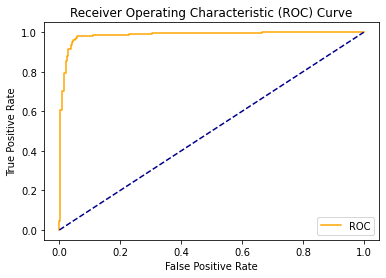

In [19]:
plot_roc_curve(fpr,tpr)